# Low-Rank Approximation

In this section, you will be asked to investigated how the trade-off between
the selected ranks of SVD and its performance in terms of reconstruction
accuracy and speed-up (in clock-time and in FLOPS).

## 1. Set-up

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Make sure your token is stored in a txt file at the location below.
# This way there is no risk that you will push it to your repo
# Never share your token with anyone, it is basically your github password!
with open('/content/gdrive/MyDrive/ece5545/token.txt') as f:
    token = f.readline().strip()
# Use another file to store your github username
with open('/content/gdrive/MyDrive/ece5545/git_username.txt') as f:
    handle = f.readline().strip()

In [3]:
# Clone your github repo
YOUR_TOKEN = token
YOUR_HANDLE = handle
BRANCH = "main"

%mkdir /content/gdrive/MyDrive/ece5545
%cd /content/gdrive/MyDrive/ece5545
!git clone https://{YOUR_TOKEN}@github.com/ML-HW-SYS/a4-{YOUR_HANDLE}.git
%cd /content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}
!git checkout {BRANCH}
!git pull

PROJECT_ROOT = f"/content/gdrive/MyDrive/ece5545/a4-{YOUR_HANDLE}"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ece5545’: File exists
/content/gdrive/MyDrive/ece5545
fatal: destination path 'a4-Madhu2244' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece5545/a4-Madhu2244
M	src/conv2d.py
M	src/matmul.py
Already on 'main'
Your branch is behind 'origin/main' by 3 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)
Updating 2c0f2c9..b5dbba5
error: Your local changes to the following files would be overwritten by merge:
	src/conv2d.py
	src/matmul.py
Please commit your changes or stash them before you merge.
Aborting


In [4]:
# This extension reloads all imports before running each cell
%load_ext autoreload
%autoreload 2

Verify the following cell prints your github repository.

In [5]:
!ls {PROJECT_ROOT}


1-numerical_precision.ipynb  data      README.md  tests
2-svd_rank.ipynb	     mnist.py  src


In [6]:
# Install required packgaes
!pip install torch numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# 2. Rank v.s. Reconstruction Error

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the reconstruction error of the matrix (in the y-axis, measured by the Frobenius Norm).

NOTE: you can use `svd(A, torch.eye(A.shape(2), rank_A=<rank>, rank_B=None)` to do SVD, drop the rank
to `<rank>`, and return the reconstruction matrix of `A`.

We will provide a series of matrix for you to study. Please make one plot per matrix.
For each plot, comment on the trade-off between the number of ranks selected and the error by answering
the following questions:
1. Is the reconstruction error increasing or decreasing as we add more rank?
2. How fast is the reconstruction error change as we add more rank? Is it changing quickly or slowly? Why?
3. Is there a rank number below/above which the reconstruction error increase significantly?
4. What can you learn about this data?

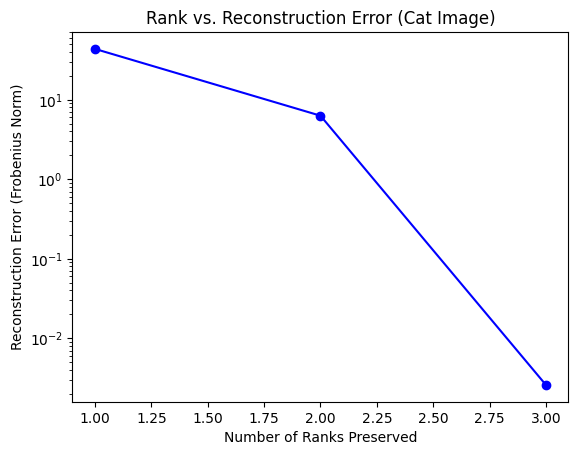

In [11]:
from src.matmul import svd
import torch
import matplotlib.image
import matplotlib.pyplot as plt

A = torch.from_numpy(matplotlib.image.imread("data/cat.png")).view(-1, 3)

max_rank = min(A.shape[0], A.shape[1])

ranks = range(1, max_rank + 1)
if max_rank not in ranks:
    ranks = list(ranks) + [max_rank]
errors = []

for rank in ranks:
    A_recon = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)

    error = torch.norm(A - A_recon, p='fro').item()
    errors.append(error)


# Plot the results
plt.plot(ranks, errors, marker='o', linestyle='-', color='b')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Number of Ranks Preserved')
plt.ylabel('Reconstruction Error (Frobenius Norm)')
plt.title('Rank vs. Reconstruction Error (Cat Image)')
plt.show()

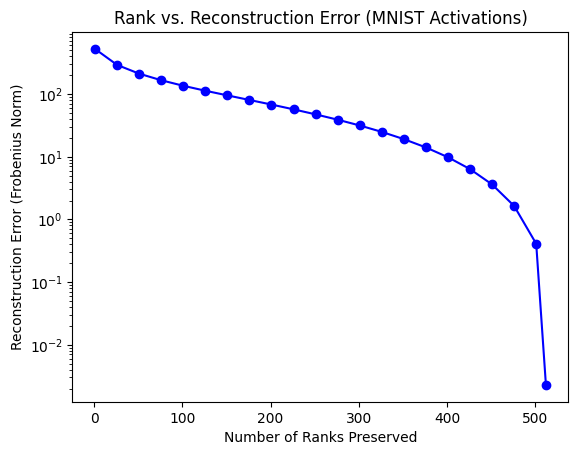

In [13]:
# A batch of MNIST digit
import torch
A = torch.load("data/mnist_act.pt")['act.0']
max_rank = min(A.shape[0], A.shape[1])

step = max(1, max_rank // 20)
ranks = range(1, max_rank + 1, step)
if max_rank not in ranks:
    ranks = list(ranks) + [max_rank]

errors = []

for rank in ranks:
    A_recon = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)

    error = torch.norm(A - A_recon, p='fro').item()
    errors.append(error)


plt.plot(ranks, errors, marker='o', linestyle='-', color='b')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Number of Ranks Preserved')
plt.ylabel('Reconstruction Error (Frobenius Norm)')
plt.title('Rank vs. Reconstruction Error (MNIST Activations)')
plt.show()

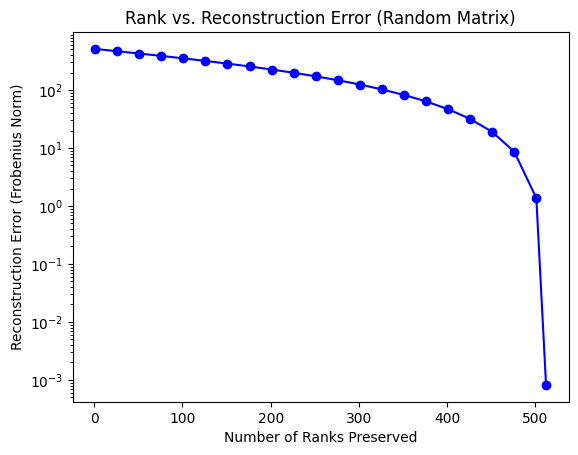

In [15]:
import torch
# A random matrix
A = torch.randn(512, 512)

max_rank = min(A.shape[0], A.shape[1])

step = max(1, max_rank // 20)
ranks = range(1, max_rank + 1, step)
if max_rank not in ranks:
    ranks = list(ranks) + [max_rank]

errors = []

for rank in ranks:
    A_recon = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)
    error = torch.norm(A - A_recon, p='fro').item()
    errors.append(error)

plt.plot(ranks, errors, marker='o', linestyle='-', color='b')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Number of Ranks Preserved')
plt.ylabel('Reconstruction Error (Frobenius Norm)')
plt.title('Rank vs. Reconstruction Error (Random Matrix)')
plt.show()

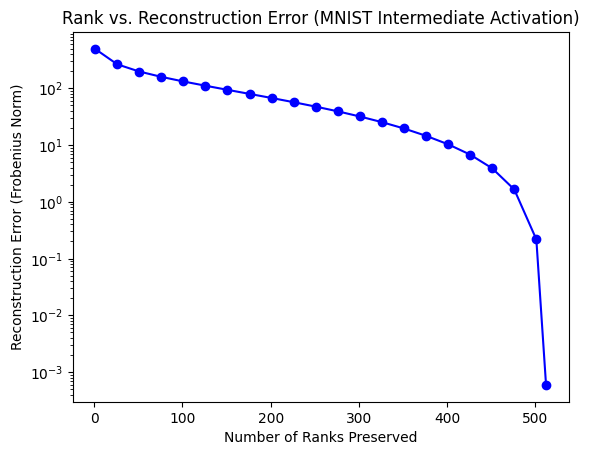

In [16]:
import torch
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

max_rank = min(A.shape[0], A.shape[1])

step = max(1, max_rank // 20)
ranks = range(1, max_rank + 1, step)
if max_rank not in ranks:
    ranks = list(ranks) + [max_rank]

errors = []

for rank in ranks:
    A_recon = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)

    error = torch.norm(A - A_recon, p='fro').item()
    errors.append(error)

plt.plot(ranks, errors, marker='o', linestyle='-', color='b')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Number of Ranks Preserved')
plt.ylabel('Reconstruction Error (Frobenius Norm)')
plt.title('Rank vs. Reconstruction Error (MNIST Intermediate Activation)')
plt.show()

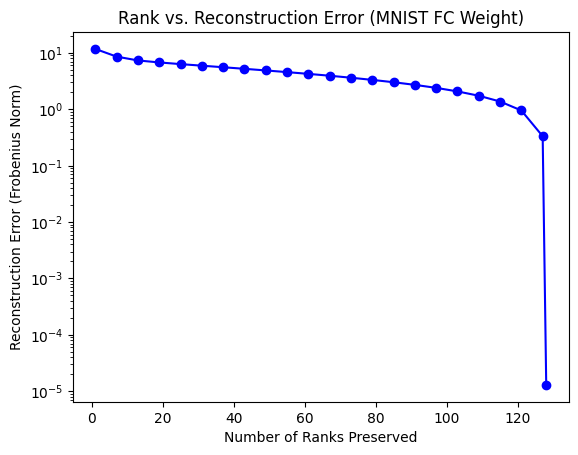

In [17]:
import torch
# Weight matrix of a fully connected neural network (trained on MNIST)
A = torch.load("data/mnist_fc.pt")['fc2.weight']

max_rank = min(A.shape[0], A.shape[1])

step = max(1, max_rank // 20)
ranks = range(1, max_rank + 1, step)
if max_rank not in ranks:
    ranks = list(ranks) + [max_rank]

errors = []

for rank in ranks:
    A_recon = svd(A, torch.eye(A.shape[1]), rank_A=rank, rank_B=None)

    error = torch.norm(A - A_recon, p='fro').item()
    errors.append(error)

plt.plot(ranks, errors, marker='o', linestyle='-', color='b')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Number of Ranks Preserved')
plt.ylabel('Reconstruction Error (Frobenius Norm)')
plt.title('Rank vs. Reconstruction Error (MNIST FC Weight)')
plt.show()

# 2. Rank v.s. Speed up

In this following cell(s), please plot the number of ranks preserved for A matrix (in the x-axis)
and the speed up of matrix-matrix multiply (in the y-axis, measured by both FLOPs and clock time)

You can assume both matrix A and B are using the same number of rank when approximating.

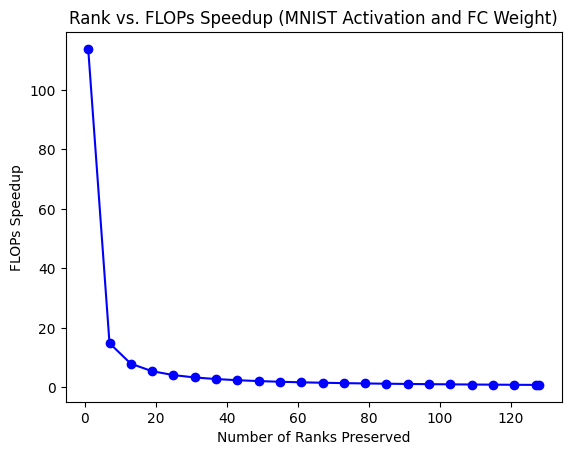

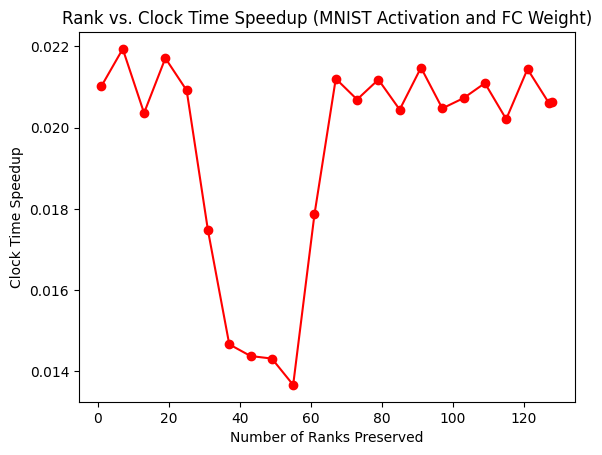

In [21]:
import torch
import time
# Intermediate activation of a Fully connected network (trained on MNIST)
A = torch.load("data/mnist_act.pt")['act.1']

# Weight matrix of a fully connected neural network (trained on MNIST)
B = torch.load("data/mnist_fc.pt")['fc2.weight'].transpose(0, 1)
N, M = A.shape
M2, K = B.shape


max_rank = min(A.shape[0], A.shape[1], B.shape[0], B.shape[1])

step = max(1, max_rank // 20)
ranks = range(1, max_rank + 1, step)
if max_rank not in ranks:
    ranks = list(ranks) + [max_rank]

flops_full = N * K * (2 * M - 1)

num_trials = 10
times_full = []
for _ in range(num_trials):
    start = time.time()
    C = A @ B
    times_full.append(time.time() - start)
time_full = sum(times_full) / num_trials

flops_speedups = []
time_speedups = []
ranks_list = []

for rank in ranks:
    C_approx = svd(A, B, rank_A=rank, rank_B=rank)

    flops_A = N * rank * (2 * rank - 1) + N * M * (2 * rank - 1)
    flops_B = M * rank * (2 * rank - 1) + rank * K * (2 * rank - 1)
    flops_mult = N * rank * (2 * M - 1) + N * K * (2 * rank - 1)
    flops_low_rank = flops_mult

    flops_speedup = flops_full / flops_low_rank if flops_low_rank > 0 else 1.0
    flops_speedups.append(flops_speedup)

    times_low_rank = []
    for _ in range(num_trials):
        start = time.time()
        C_approx = svd(A, B, rank_A=rank, rank_B=rank)
        times_low_rank.append(time.time() - start)
    time_low_rank = sum(times_low_rank) / num_trials

    time_speedup = time_full / time_low_rank if time_low_rank > 0 else 1.0
    time_speedups.append(time_speedup)

    ranks_list.append(rank)

plt.plot(ranks_list, flops_speedups, marker='o', linestyle='-', color='b')
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('Number of Ranks Preserved')
plt.ylabel('FLOPs Speedup')
plt.title('Rank vs. FLOPs Speedup (MNIST Activation and FC Weight)')
plt.show()

plt.plot(ranks_list, time_speedups, marker='o', linestyle='-', color='r')
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel('Number of Ranks Preserved')
plt.ylabel('Clock Time Speedup')
plt.title('Rank vs. Clock Time Speedup (MNIST Activation and FC Weight)')
plt.show()
